In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r"C:/Users/ankit/Desktop/DATA SCIENCE/data_files/titanic_data/train.csv")

In [3]:
test=pd.read_csv("C:\\Users\\ankit\\Desktop\\DATA SCIENCE\\data_files\\titanic_data\\test.csv")

In [4]:
train.shape

(891, 12)

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


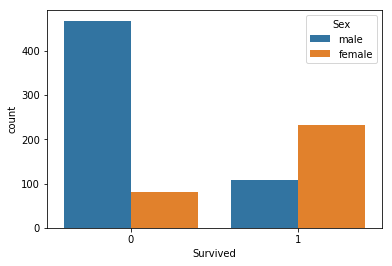

In [6]:
sns.countplot(x="Survived",hue="Sex",data=train)

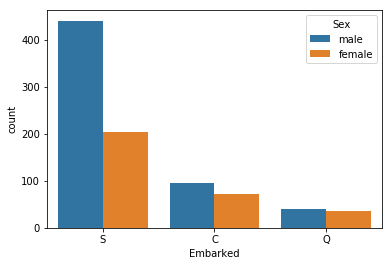

In [7]:
sns.countplot(x="Embarked",hue="Sex",data=train)

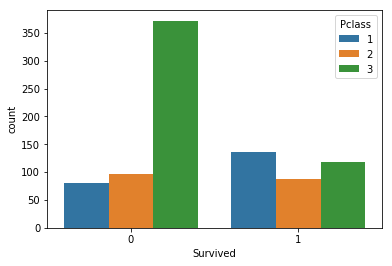

In [8]:
sns.countplot(x="Survived",data=train,hue="Pclass")

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


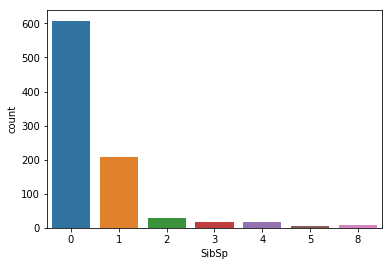

In [10]:
sns.countplot(x="SibSp",data=train)

In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# DATA CLEANING

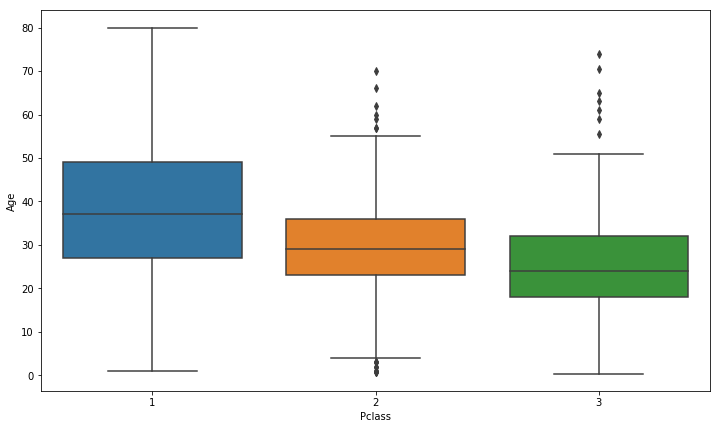

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [13]:
train.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [14]:
def imputeage(cols):
    age=cols[0]
    pclass=cols[1]

    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age
    
        

In [15]:
train["Age"]=train[["Age","Pclass"]].apply(imputeage,axis=1)

In [16]:
train["Age"].isna().sum()

0

In [17]:
train.drop("Cabin",axis=1,inplace=True)

In [18]:
train.dropna(inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [21]:
d={"male":0,"female":1}
train["Sex"]=train["Sex"].map(d)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [23]:
# dummies technique for categorisation
embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [24]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [25]:
train.drop(["Embarked","Name","Ticket"],axis=1,inplace=True)

In [26]:
train=pd.concat([train,embark],axis=1)

In [27]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1
5,6,0,3,0,25.0,0,0,8.4583,1,0
6,7,0,1,0,54.0,0,0,51.8625,0,1
7,8,0,3,0,2.0,3,1,21.0750,0,1
8,9,1,3,1,27.0,0,2,11.1333,0,1
9,10,1,2,1,14.0,1,0,30.0708,0,0


# training and spliting data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.30,random_state=87)

In [30]:
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
398,399,2,0,23.0,0,0,10.5000,0,1
324,325,3,0,25.0,8,2,69.5500,0,1
267,268,3,0,25.0,1,0,7.7750,0,1
278,279,3,0,7.0,4,1,29.1250,1,0
415,416,3,1,25.0,0,0,8.0500,0,1
218,219,1,1,32.0,0,0,76.2917,0,0
65,66,3,0,25.0,1,1,15.2458,0,0
335,336,3,0,25.0,0,0,7.8958,0,1
840,841,3,0,20.0,0,0,7.9250,0,1
674,675,2,0,29.0,0,0,0.0000,0,1


In [31]:
ytrain

398    0
324    0
267    1
278    0
415    0
218    1
65     1
335    0
840    0
674    0
579    1
619    0
121    0
462    0
535    1
821    1
182    0
127    1
432    1
690    1
145    0
400    1
371    0
661    0
251    0
631    0
283    1
387    1
813    0
823    1
      ..
493    0
789    0
617    0
875    1
346    1
620    0
255    1
351    0
119    0
855    1
408    0
73     0
553    1
164    0
788    1
201    0
555    0
111    0
62     0
225    0
573    1
522    0
353    0
820    1
6      0
252    0
144    0
700    1
334    1
487    0
Name: Survived, Length: 622, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic=LogisticRegression()

In [34]:
logistic.fit(xtrain,ytrain)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
prediction=logistic.predict(xtest)

In [36]:
prediction

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [37]:
ytest

657    0
852    0
664    1
718    0
15     1
874    1
483    1
28     1
547    1
137    0
59     0
153    0
298    1
800    0
58     1
383    1
269    1
425    0
79     1
412    1
233    1
313    0
112    0
44     1
871    1
407    1
622    1
873    0
449    1
603    0
      ..
228    0
187    1
550    1
799    0
417    1
444    1
285    0
499    0
445    1
594    0
203    0
183    1
9      1
338    1
284    0
848    0
418    0
138    0
511    0
668    0
68     1
358    1
232    0
403    0
227    0
460    1
210    0
759    1
685    0
336    0
Name: Survived, Length: 267, dtype: int64

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       169
           1       0.75      0.66      0.70        98

   micro avg       0.79      0.79      0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [40]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

In [41]:
print(confusion_matrix(ytest,prediction))

[[147  22]
 [ 33  65]]


In [60]:
fpr, tpr, thresholds = roc_curve(ytest,prediction)

In [61]:
auc(fpr,tpr)

0.7665438956647748

In [62]:
thresholds

array([2, 1, 0], dtype=int64)

In [63]:
fpr

array([0.        , 0.13017751, 1.        ])

In [64]:
tpr

array([0.        , 0.66326531, 1.        ])

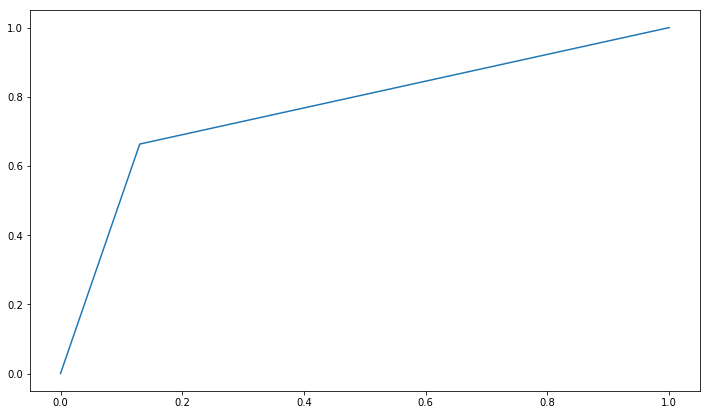

In [65]:
plt.figure(figsize=(12,7))
plt.plot(fpr,tpr)